In [17]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import folium   
# from branca.element import Figure    
import plotly.express as px
# import nbformat
pd.set_option('display.max_columns', None)

df = pd.read_csv("data/allocine_bronze.csv")


In [18]:
df

,titre,acteur_1,acteur_2,acteur_3,réalisateur,distributeur,note_presse,note_spectateur,duree,type,nominations,prix,description,date,annee_production,Entrées_1ère_semaine,nb_pays_uniques,pays_1,genre_1,budget_en_$
0,La Daronne,Isabelle Huppert,Hippolyte Girardot,Liliane Rovère,Jean-Paul Salomé,Le Pacte,"3,0","3,0",106,Long-métrage,6,0,Patience Portefeux est interprète judiciaire f...,09-09-2020,2020,130560,1,France,Policier,NaN
1,Un soupçon d'amour,Marianne Basler,Fabienne Babe,Jean-Philippe Puymartin,Paul Vecchiali,Epicentre Films,"3,6","2,3",92,Long-métrage,0,0,"Geneviève Garland, une célèbre comédienne, rép...",09-09-2020,2020,2317,1,France,Drame,NaN
2,Sole,Sandra Drzymalska,Claudio Segaluscio,Barbara Ronchi,Carlo Sironi,Les Valseurs,"3,2","3,6",100,Long-métrage,0,0,Le jeune Ermanno vit dans une Italie sans futu...,09-09-2020,2019,4196,2,Italie,Drame,NaN
3,Remember Me,Bruce Dern,Caroline Silhol,Brian Cox,Martín Rosete,Alba Films,"2,5","2,8",81,Long-métrage,0,0,"Claude est septuagénaire, veuf et critique de ...",09-09-2020,2019,4737,3,U.S.A.,Romance,NaN
4,Les Nouvelles Aventures De Rita Et Machin,Célia Asensio,Tangi Simon,Nolwenn Korbell,Pon Kozutsumi,Eurozoom,"3,1","3,0",45,Long-métrage,0,0,"Après Les Aventures de Rita & Machin, découvre...",09-09-2020,2019,5015,2,France,Animation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,Orage,Raf Vallone,Françoise Arnoul,NaN,Pierre Billon,NaN,"3,0",NaN,100,Long-métrage,0,0,NaN,NaN,1954,1982,2,France,Comédie,NaN
8267,La Jungle,Rod Cameron,Cesar Romero,Marie Windsor,William Berke,NaN,"3,2",NaN,73,Long-métrage,0,0,NaN,NaN,1952,54164,2,U.S.A.,Drame,NaN
8268,Une Histoire d'amour,Louis Jouvet,Daniel Gélin,Dany Robin,Guy Lefranc,NaN,"3,8",NaN,99,Long-métrage,0,0,Dans un terrain vague sont decouverts les corp...,NaN,1951,26209,1,France,Comédie dramatique,NaN
8269,Retour de flamme,Roger Pigaut,Renée Saint-Cyr,José Noguéro,Henri Fescourt,NaN,"3,1",NaN,102,Long-métrage,0,0,Un jeune ingénieur invente en aéronautique inv...,NaN,1943,25319,1,France,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   titre                 8271 non-null   object 
 1   acteur_1              8072 non-null   object 
 2   acteur_2              8040 non-null   object 
 3   acteur_3              7982 non-null   object 
 4   réalisateur           8261 non-null   object 
 5   distributeur          7977 non-null   object 
 6   note_presse           8040 non-null   object 
 7   note_spectateur       7576 non-null   object 
 8   duree                 8271 non-null   int64  
 9   type                  8271 non-null   object 
 10  nominations           8271 non-null   int64  
 11  prix                  8271 non-null   int64  
 12  description           7369 non-null   object 
 13  date                  7816 non-null   object 
 14  annee_production      8271 non-null   int64  
 15  Entrées_1ère_semaine 

<font color='red'><h2>Répartition des films par bloc d'année de 10 </h2></font>

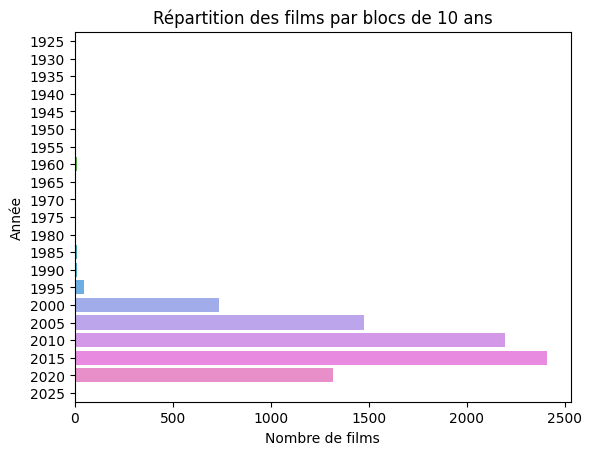

In [20]:
# Création d'un masque pour les blocs de 10 ans
annee_bloc = (df['annee_production'] // 5) * 5

# Affichage des données par blocs de 10 ans en utilisant le masque
sns.countplot(y=annee_bloc, data=df)
plt.ylabel("Année")
plt.xlabel("Nombre de films")
plt.title("Répartition des films par blocs de 10 ans")
plt.show()

  <font color='red'><h2> Nuage de mots pour genre_1  </h2></font>


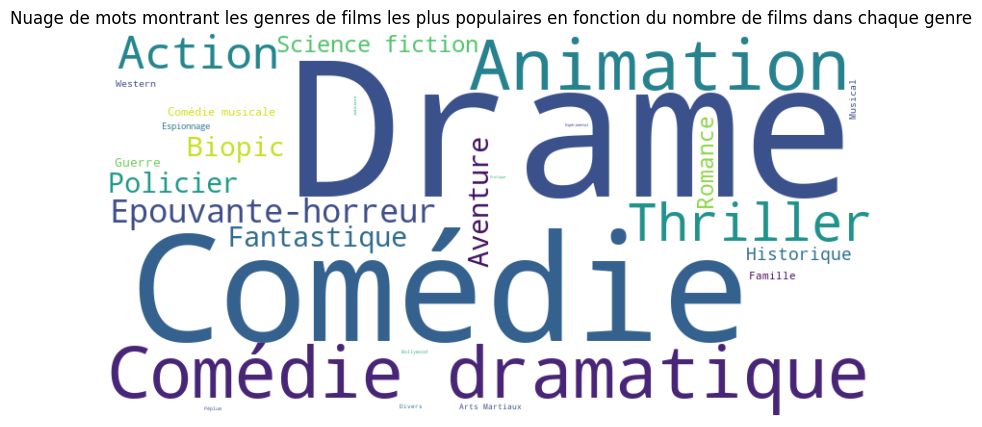

In [21]:
! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['genre_1'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()


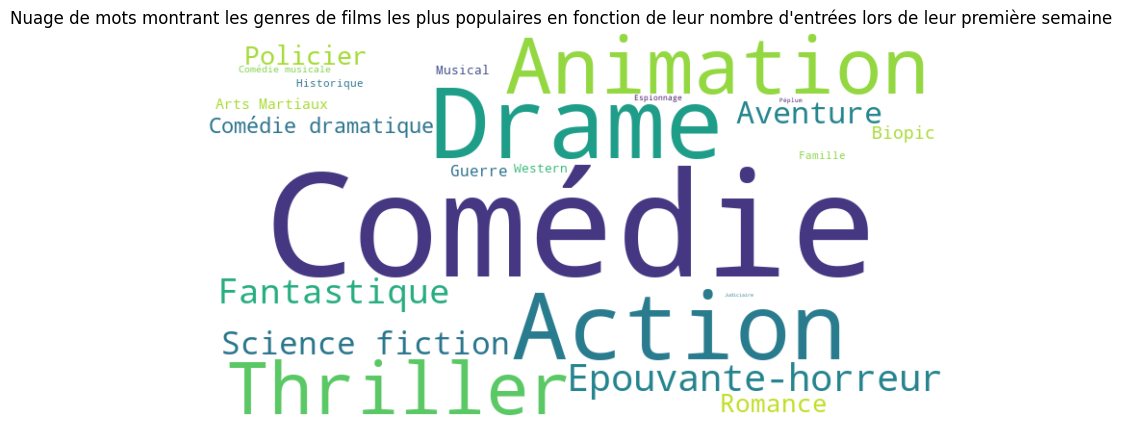

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre d'entrées lors de leur première semaine
data = df.groupby('genre_1')['Entrées_1ère_semaine'].sum()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction de leur nombre d'entrées lors de leur première semaine")
plt.show()

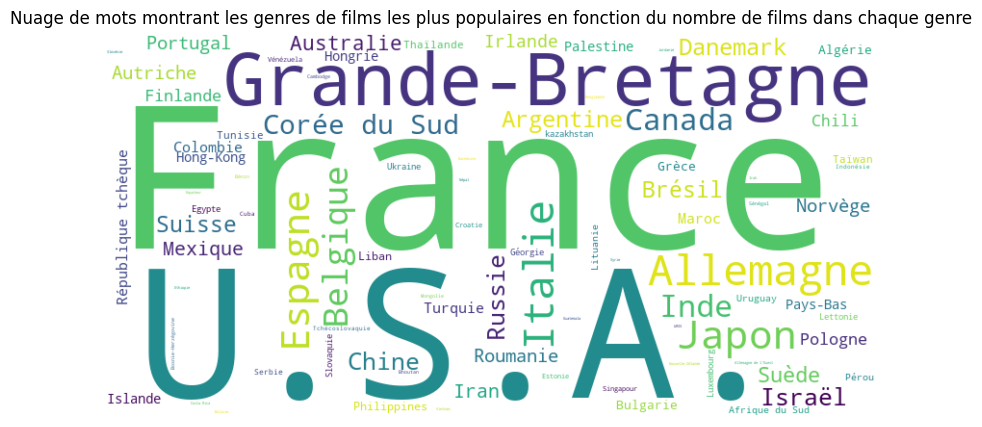

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre de films
data = df['pays_1'].value_counts()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction du nombre de films dans chaque genre")
plt.show()

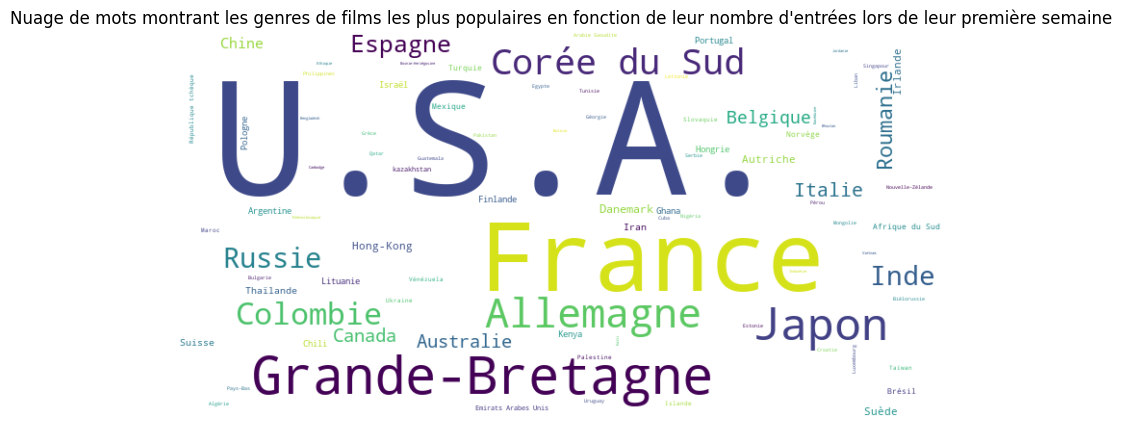

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer une série avec les genres de films et leur nombre d'entrées lors de leur première semaine
data = df.groupby('pays_1')['Entrées_1ère_semaine'].sum()

# Créer le nuage de mots avec WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots montrant les genres de films les plus populaires en fonction de leur nombre d'entrées lors de leur première semaine")
plt.show()